# Bibliotek

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import os

# UVSPEC + Filoverføring

In [2]:
def run_uvspec(input_file_name, output_file_name):
    # File paths
    wsl_dir = "/home/kollis/libRadtran-2.0.5/TTK4265/"
    wsl_input_file = f"{wsl_dir}{input_file_name}"
    wsl_output_file = f"{wsl_dir}{output_file_name}"

    input_dir = f"/mnt/c/Github/TTK4265-OptiskFjernmaaling/Prosjekt2/Data/{input_file_name}" 
    output_dir = f"/mnt/c/Github/TTK4265-OptiskFjernmaaling/Prosjekt2/Data/{output_file_name}"

    # Copy the input file from Windows to WSL
    copy_input = ["wsl", "cp", "-f", input_dir, wsl_input_file]
    subprocess.run(copy_input, check=True)

    # Run uvspec in WSL
    run_uvspec_cmd = f"cd {wsl_dir} && uvspec < {input_file_name} > {output_file_name}"
    subprocess.run(["wsl", "bash", "-c", run_uvspec_cmd], check=True)

    # Move the output file from WSL to Windows
    move_output = ["wsl", "mv", "-f", wsl_output_file, output_dir]
    subprocess.run(move_output, check=True)


# Example usage
run_uvspec("input_file", "output_file2")

# Plotting av data

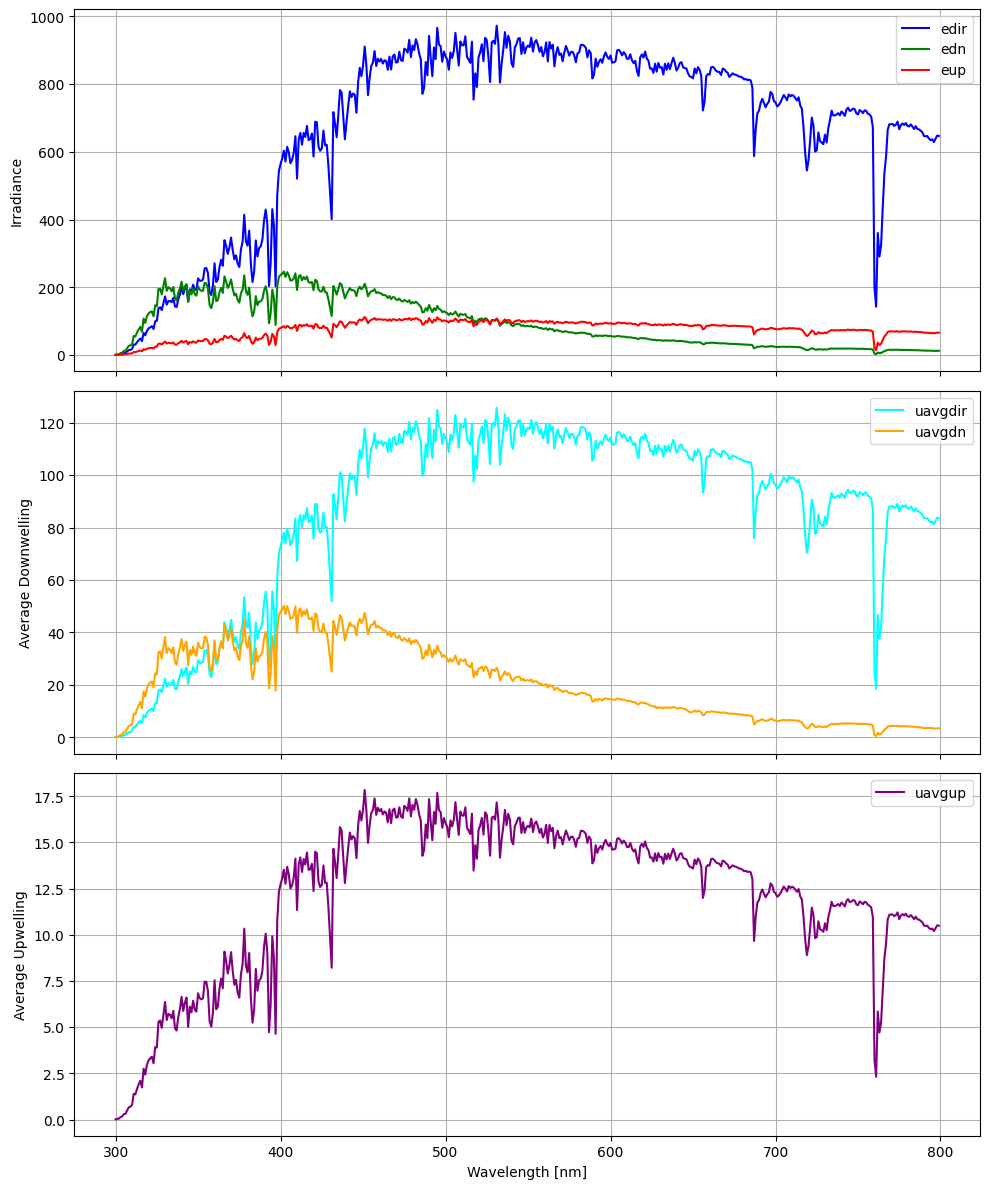

In [3]:
Data = np.loadtxt('Data/output_file')
Data = pd.DataFrame(Data, columns=['lambda', 'edir', 'edn', 'eup', 'uavgdir', 'uavgdn', 'uavgup'])

# lambda = Wavelength [nm]
# edir = Direct Irradiance [W/m^2/nm]
# edn = Diffuse Down Irradiance [W/m^2/nm]
# eup = Diffuse Up Irradiance [W/m^2/nm]
# uavgdir = Average Direct Downwelling Irradiance [W/m^2/nm]
# uavgdn = Average Diffuse Downwelling Irradiance [W/m^2/nm]
# uavgup = Average Diffuse Upwelling Irradiance [W/m^2/nm]

eglo = Data['edir'] + Data['edn'] 
uavg = Data['uavgdir'] + Data['uavgdn'] + Data['uavgup'] 



#cmap = plt.get_cmap('viridis')
#colors = cmap(np.linspace(0, 1, 6))

colors = ['blue', 'green', 'red', 'cyan', 'orange', 'purple'] 

# Create a figure and a grid of subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Plot edir, edn, and eup in the first subplot
axs[0].plot(Data['lambda'], Data['edir'], label='edir', color=colors[0])
axs[0].plot(Data['lambda'], Data['edn'], label='edn', color=colors[1])
axs[0].plot(Data['lambda'], Data['eup'], label='eup', color=colors[2])
axs[0].legend()
axs[0].set_ylabel('Irradiance')
axs[0].grid(True)

# Plot uavgdir and uavgdn in the second subplot
axs[1].plot(Data['lambda'], Data['uavgdir'], label='uavgdir', color=colors[3])
axs[1].plot(Data['lambda'], Data['uavgdn'], label='uavgdn', color=colors[4])
axs[1].legend()
axs[1].set_ylabel('Average Downwelling')
axs[1].grid(True)

# Plot uavgup in the third subplot
axs[2].plot(Data['lambda'], Data['uavgup'], label='uavgup', color=colors[5])
axs[2].legend()
axs[2].set_ylabel('Average Upwelling')
axs[2].set_xlabel('Wavelength [nm]')
axs[2].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()